In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [13]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [14]:
X = data.drop('0',axis = 1)
y = data['0']


In [15]:
Train_x, test_x, Train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x, val_x, train_y, val_y = train_test_split(Train_x, Train_y, test_size = 0.15)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
val_x = np.reshape(val_x.values, (val_x.shape[0], 28,28))

print("Train data shape: ", Train_x.shape)
print("Test data shape: ", test_x.shape)
print("val data shape: ", val_x.shape)

Train data shape:  (297960, 784)
Test data shape:  (74490, 28, 28)
val data shape:  (44694, 28, 28)


In [17]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

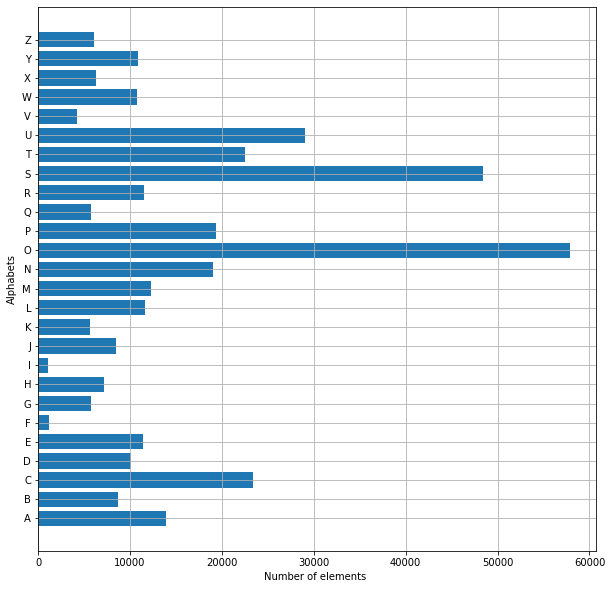

In [18]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

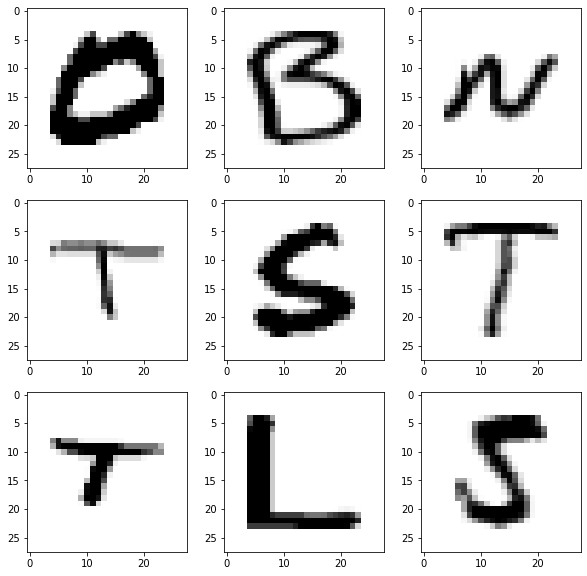

In [19]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [20]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

val_X = val_x.reshape(val_x.shape[0], val_x.shape[1], val_x.shape[2],1)
print("New shape of train data: ", val_X.shape)

New shape of train data:  (253266, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)
New shape of train data:  (44694, 28, 28, 1)


In [21]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

val_yOHE = to_categorical(val_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", val_yOHE.shape)

New shape of train labels:  (253266, 26)
New shape of test labels:  (74490, 26)
New shape of test labels:  (44694, 26)


In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

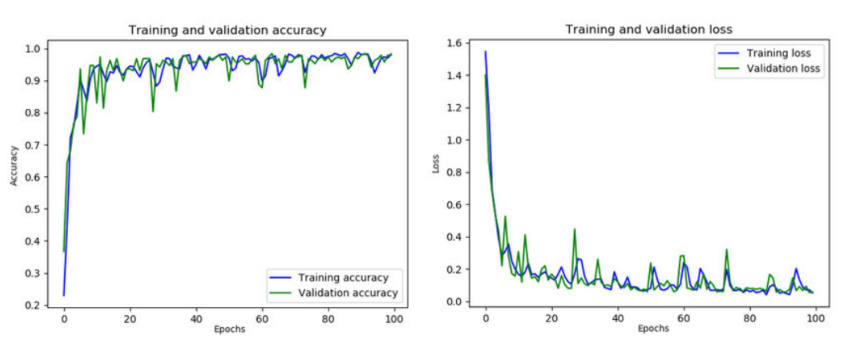

In [14]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (val_X,val_yOHE))

# Summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()
# Summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='lower right')
plt.show()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

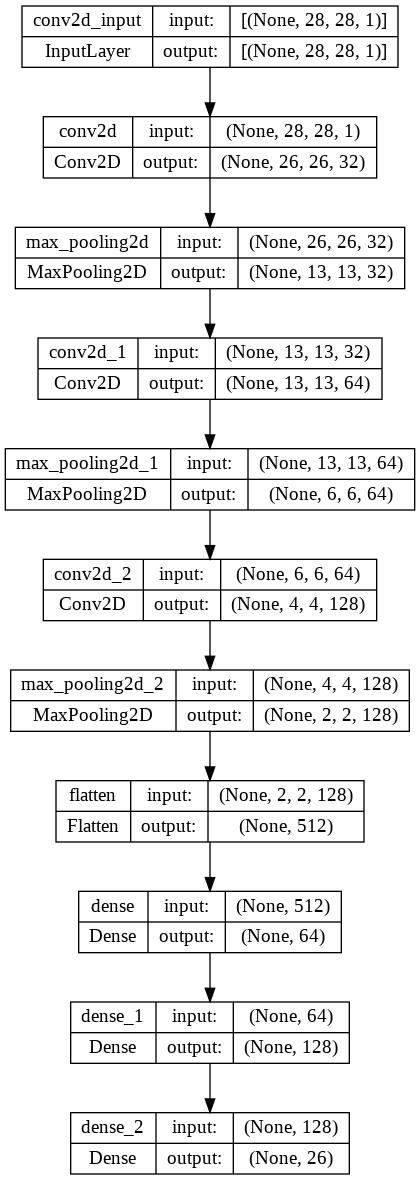

In [27]:
from keras.utils import plot_model
import tensorflow as tf
ifile = 'model.jpg'
tf.keras.utils.plot_model (model, to_file = ifile, show_shapes = True, show_layer_names = True)

In [28]:
model.save(r'model_hand_colab.h5')

In [32]:
predictions = model.predict(test_x)

2328/2328 [==============================] - 35s 15ms/step


In [33]:
print(predictions)

[[1.9486826e-08 5.4448737e-08 1.4402703e-05 ... 2.7033270e-04
  9.9554998e-01 1.5797575e-07]
 [9.9991184e-01 1.1132763e-07 9.9029916e-11 ... 1.9287691e-07
  4.1062127e-09 3.5206521e-10]
 [2.3857683e-06 8.2280900e-07 1.7691411e-07 ... 2.2525783e-10
  5.0632730e-06 6.0949510e-08]
 ...
 [1.4548746e-03 2.6496875e-07 4.3333202e-06 ... 1.0100252e-03
  1.9433156e-03 1.6585307e-05]
 [4.6365760e-09 4.1072123e-10 8.5426322e-10 ... 9.8141335e-09
  4.4921002e-08 1.5531769e-09]
 [1.0002780e-05 2.2445175e-08 1.7867146e-04 ... 1.7652847e-07
  2.8821219e-08 1.8460407e-05]]


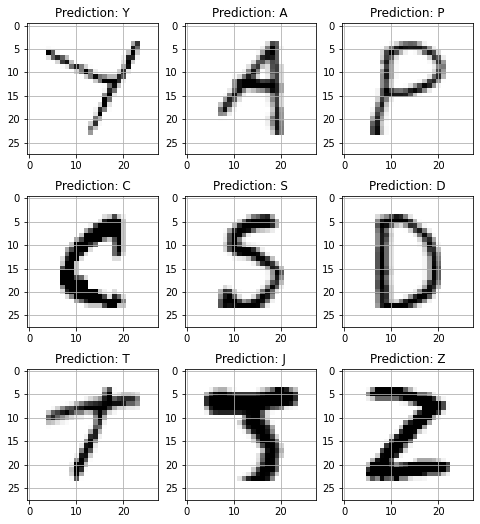

In [35]:
# Prediction on test data
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
count=0

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(predictions[i])]
    pred1 = word_dict[np.argmax(test_yOHE[i])]
    if(pred==pred1):
      count=count+1
    
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [36]:
count=0
for i in range(test_x.shape[0]):
  pred = word_dict[np.argmax(predictions[i])]
  pred1 = word_dict[np.argmax(test_yOHE[i])]
  if(pred==pred1):
    count=count+1

In [1]:
print("Test accuracy: "(count/test_x.shape[0])*100)

Test accuracy:  97.6923076923077
